In [1]:
import ROOT
import numpy as np
from utils.agc_sample import AGC_Sample
from utils.rebinning_tool import RebinningTool
from utils.extra import MuteTool
from utils.drawer import Visualization, DrawModel

result_file = ROOT.TFile("fitResults.root", "READ")

# Retrieve the fit result from the file
fit_result = result_file.Get("fitResult")

input_file = "data/histograms_ml.root" # input file for futher defined histograms

/home/valerii/Documents/IRIS/root_agc_upgrade/utils/agc_sample.py:5: RuntimeWarning: class "RooStats::HistFactory::Sample" has no virtual destructor
  class AGC_Sample(ROOT.RooStats.HistFactory.Sample):


[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1w2_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1w2_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExt

Info in <TCanvas::Print>: png file channel_deltar_w1w2_histo.png has been created


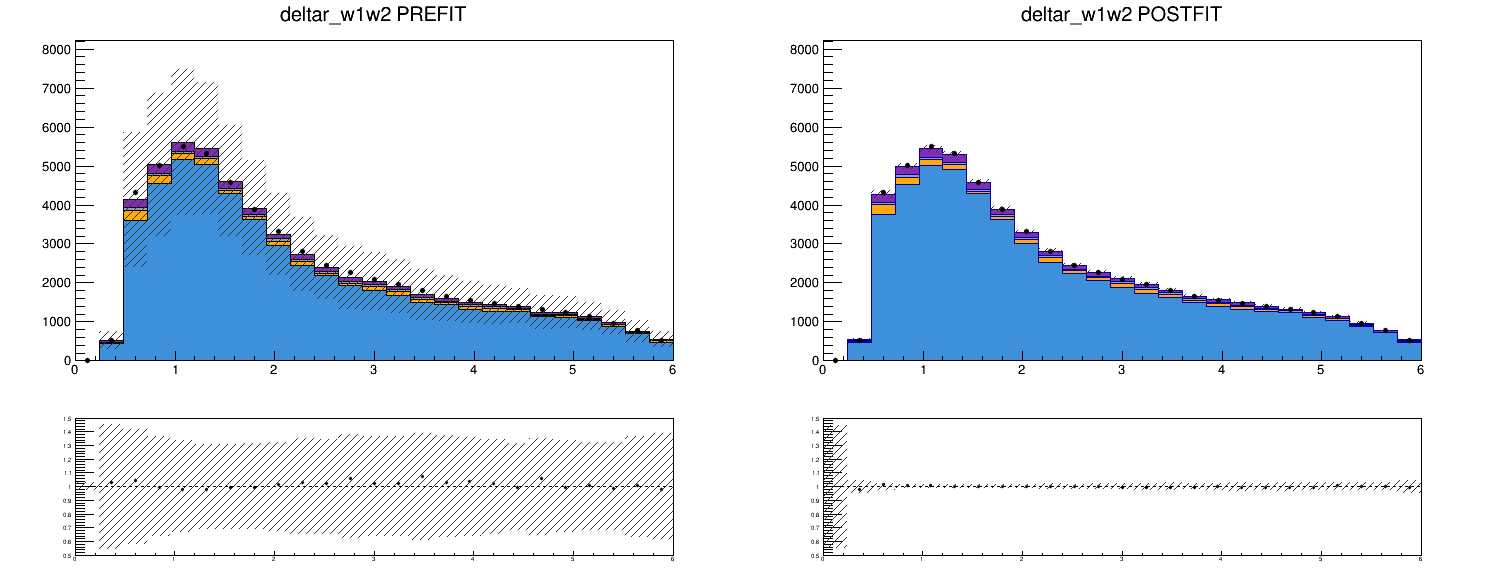

In [2]:

meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_deltar_w1w2")
channel.SetData("deltar_w1w2_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "deltar_w1w2_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "deltar_w1w2_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "deltar_w1w2_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "deltar_w1w2_ttbar_scaleup",        histoname_down = "deltar_w1w2_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w1w2_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_w1w2_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w1w2_ttbar_btag_var_0_up",  histoname_down = "deltar_w1w2_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w1w2_ttbar_btag_var_1_up",  histoname_down = "deltar_w1w2_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w1w2_ttbar_btag_var_2_up",  histoname_down = "deltar_w1w2_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w1w2_ttbar_btag_var_3_up",  histoname_down = "deltar_w1w2_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "deltar_w1w2_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "deltar_w1w2_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "deltar_w1w2_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "deltar_w1w2_wjets_btag_var_0_up",  histoname_down = "deltar_w1w2_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "deltar_w1w2_wjets_btag_var_1_up",  histoname_down = "deltar_w1w2_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "deltar_w1w2_wjets_btag_var_2_up",  histoname_down = "deltar_w1w2_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "deltar_w1w2_wjets_btag_var_3_up",  histoname_down = "deltar_w1w2_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "deltar_w1w2_wjets_scale_var_up",   histoname_down = "deltar_w1w2_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "deltar_w1w2_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w1w2_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_w1w2_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w1w2_single_top_s_chan_btag_var_0_up",  histoname_down = "deltar_w1w2_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w1w2_single_top_s_chan_btag_var_1_up",  histoname_down = "deltar_w1w2_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w1w2_single_top_s_chan_btag_var_2_up",  histoname_down = "deltar_w1w2_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w1w2_single_top_s_chan_btag_var_3_up",  histoname_down = "deltar_w1w2_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "deltar_w1w2_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w1w2_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_w1w2_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w1w2_single_top_t_chan_btag_var_0_up",  histoname_down = "deltar_w1w2_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w1w2_single_top_t_chan_btag_var_1_up",  histoname_down = "deltar_w1w2_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w1w2_single_top_t_chan_btag_var_2_up",  histoname_down = "deltar_w1w2_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w1w2_single_top_t_chan_btag_var_3_up",  histoname_down = "deltar_w1w2_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "deltar_w1w2_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w1w2_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "deltar_w1w2_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w1w2_single_top_tW_btag_var_0_up",      histoname_down = "deltar_w1w2_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w1w2_single_top_tW_btag_var_1_up",      histoname_down = "deltar_w1w2_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w1w2_single_top_tW_btag_var_2_up",      histoname_down = "deltar_w1w2_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w1w2_single_top_tW_btag_var_3_up",      histoname_down = "deltar_w1w2_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1btophad_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1btophad_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/Hist

Info in <TCanvas::Print>: png file channel_deltar_w1btophad_histo.png has been created


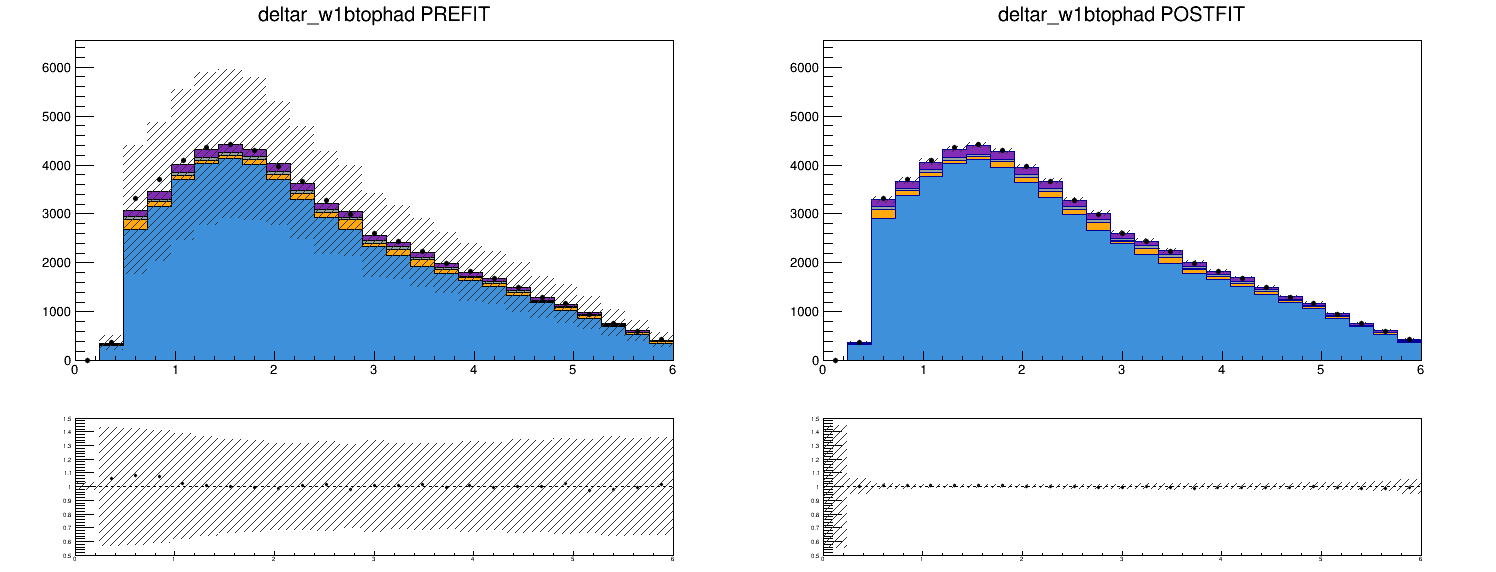

In [3]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_deltar_w1btophad")
channel.SetData("deltar_w1btophad_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "deltar_w1btophad_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "deltar_w1btophad_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "deltar_w1btophad_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "deltar_w1btophad_ttbar_scaleup",        histoname_down = "deltar_w1btophad_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w1btophad_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_w1btophad_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w1btophad_ttbar_btag_var_0_up",  histoname_down = "deltar_w1btophad_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w1btophad_ttbar_btag_var_1_up",  histoname_down = "deltar_w1btophad_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w1btophad_ttbar_btag_var_2_up",  histoname_down = "deltar_w1btophad_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w1btophad_ttbar_btag_var_3_up",  histoname_down = "deltar_w1btophad_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "deltar_w1btophad_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "deltar_w1btophad_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "deltar_w1btophad_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "deltar_w1btophad_wjets_btag_var_0_up",  histoname_down = "deltar_w1btophad_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "deltar_w1btophad_wjets_btag_var_1_up",  histoname_down = "deltar_w1btophad_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "deltar_w1btophad_wjets_btag_var_2_up",  histoname_down = "deltar_w1btophad_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "deltar_w1btophad_wjets_btag_var_3_up",  histoname_down = "deltar_w1btophad_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "deltar_w1btophad_wjets_scale_var_up",   histoname_down = "deltar_w1btophad_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "deltar_w1btophad_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w1btophad_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_w1btophad_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w1btophad_single_top_s_chan_btag_var_0_up",  histoname_down = "deltar_w1btophad_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w1btophad_single_top_s_chan_btag_var_1_up",  histoname_down = "deltar_w1btophad_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w1btophad_single_top_s_chan_btag_var_2_up",  histoname_down = "deltar_w1btophad_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w1btophad_single_top_s_chan_btag_var_3_up",  histoname_down = "deltar_w1btophad_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "deltar_w1btophad_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w1btophad_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_w1btophad_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w1btophad_single_top_t_chan_btag_var_0_up",  histoname_down = "deltar_w1btophad_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w1btophad_single_top_t_chan_btag_var_1_up",  histoname_down = "deltar_w1btophad_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w1btophad_single_top_t_chan_btag_var_2_up",  histoname_down = "deltar_w1btophad_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w1btophad_single_top_t_chan_btag_var_3_up",  histoname_down = "deltar_w1btophad_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "deltar_w1btophad_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w1btophad_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "deltar_w1btophad_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w1btophad_single_top_tW_btag_var_0_up",      histoname_down = "deltar_w1btophad_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w1btophad_single_top_tW_btag_var_1_up",      histoname_down = "deltar_w1btophad_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w1btophad_single_top_tW_btag_var_2_up",      histoname_down = "deltar_w1btophad_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w1btophad_single_top_tW_btag_var_3_up",      histoname_down = "deltar_w1btophad_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w2btophad_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w2btophad_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/Hist

Info in <TCanvas::Print>: png file channel_deltar_w2btophad_histo.png has been created


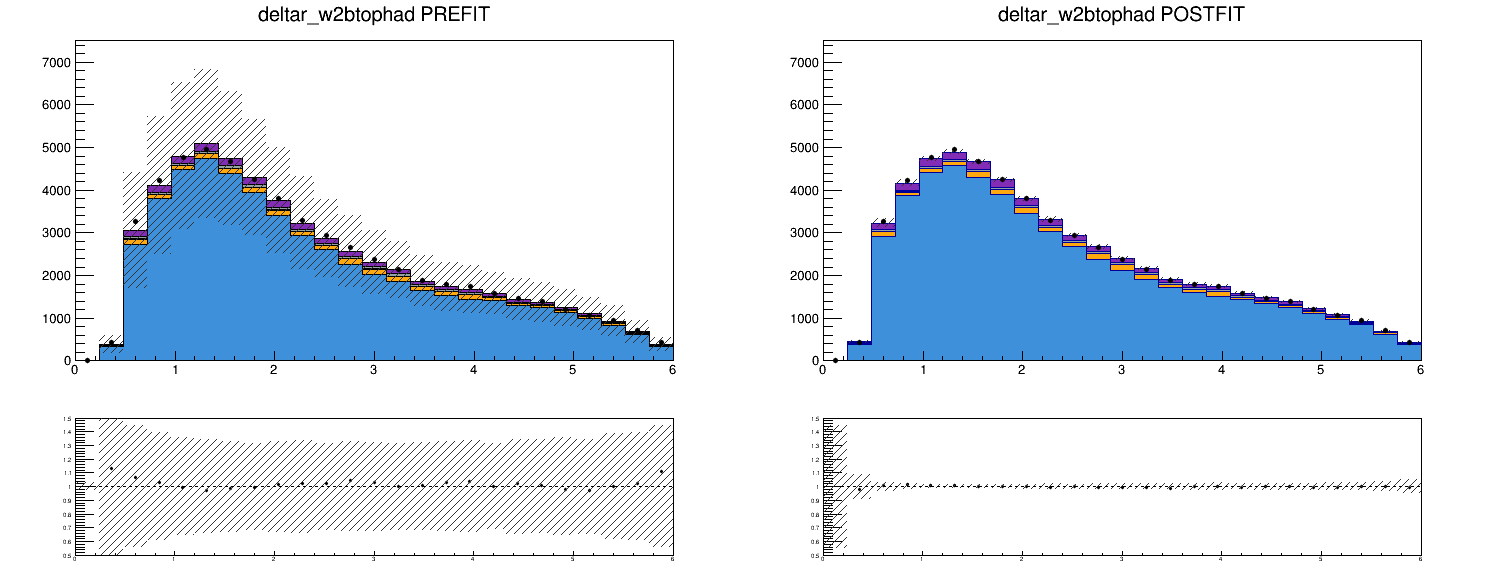

In [4]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_deltar_w2btophad")
channel.SetData("deltar_w2btophad_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "deltar_w2btophad_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "deltar_w2btophad_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "deltar_w2btophad_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "deltar_w2btophad_ttbar_scaleup",        histoname_down = "deltar_w2btophad_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w2btophad_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_w2btophad_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w2btophad_ttbar_btag_var_0_up",  histoname_down = "deltar_w2btophad_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w2btophad_ttbar_btag_var_1_up",  histoname_down = "deltar_w2btophad_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w2btophad_ttbar_btag_var_2_up",  histoname_down = "deltar_w2btophad_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w2btophad_ttbar_btag_var_3_up",  histoname_down = "deltar_w2btophad_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "deltar_w2btophad_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "deltar_w2btophad_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "deltar_w2btophad_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "deltar_w2btophad_wjets_btag_var_0_up",  histoname_down = "deltar_w2btophad_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "deltar_w2btophad_wjets_btag_var_1_up",  histoname_down = "deltar_w2btophad_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "deltar_w2btophad_wjets_btag_var_2_up",  histoname_down = "deltar_w2btophad_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "deltar_w2btophad_wjets_btag_var_3_up",  histoname_down = "deltar_w2btophad_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "deltar_w2btophad_wjets_scale_var_up",   histoname_down = "deltar_w2btophad_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "deltar_w2btophad_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w2btophad_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_w2btophad_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w2btophad_single_top_s_chan_btag_var_0_up",  histoname_down = "deltar_w2btophad_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w2btophad_single_top_s_chan_btag_var_1_up",  histoname_down = "deltar_w2btophad_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w2btophad_single_top_s_chan_btag_var_2_up",  histoname_down = "deltar_w2btophad_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w2btophad_single_top_s_chan_btag_var_3_up",  histoname_down = "deltar_w2btophad_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "deltar_w2btophad_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w2btophad_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_w2btophad_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w2btophad_single_top_t_chan_btag_var_0_up",  histoname_down = "deltar_w2btophad_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w2btophad_single_top_t_chan_btag_var_1_up",  histoname_down = "deltar_w2btophad_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w2btophad_single_top_t_chan_btag_var_2_up",  histoname_down = "deltar_w2btophad_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w2btophad_single_top_t_chan_btag_var_3_up",  histoname_down = "deltar_w2btophad_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "deltar_w2btophad_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_w2btophad_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "deltar_w2btophad_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_w2btophad_single_top_tW_btag_var_0_up",      histoname_down = "deltar_w2btophad_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_w2btophad_single_top_tW_btag_var_1_up",      histoname_down = "deltar_w2btophad_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_w2btophad_single_top_tW_btag_var_2_up",      histoname_down = "deltar_w2btophad_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_w2btophad_single_top_tW_btag_var_3_up",      histoname_down = "deltar_w2btophad_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/mass_leptonbtoplep_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/mass_leptonbtoplep_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactor

Info in <TCanvas::Print>: png file channel_mass_leptonbtoplep_histo.png has been created


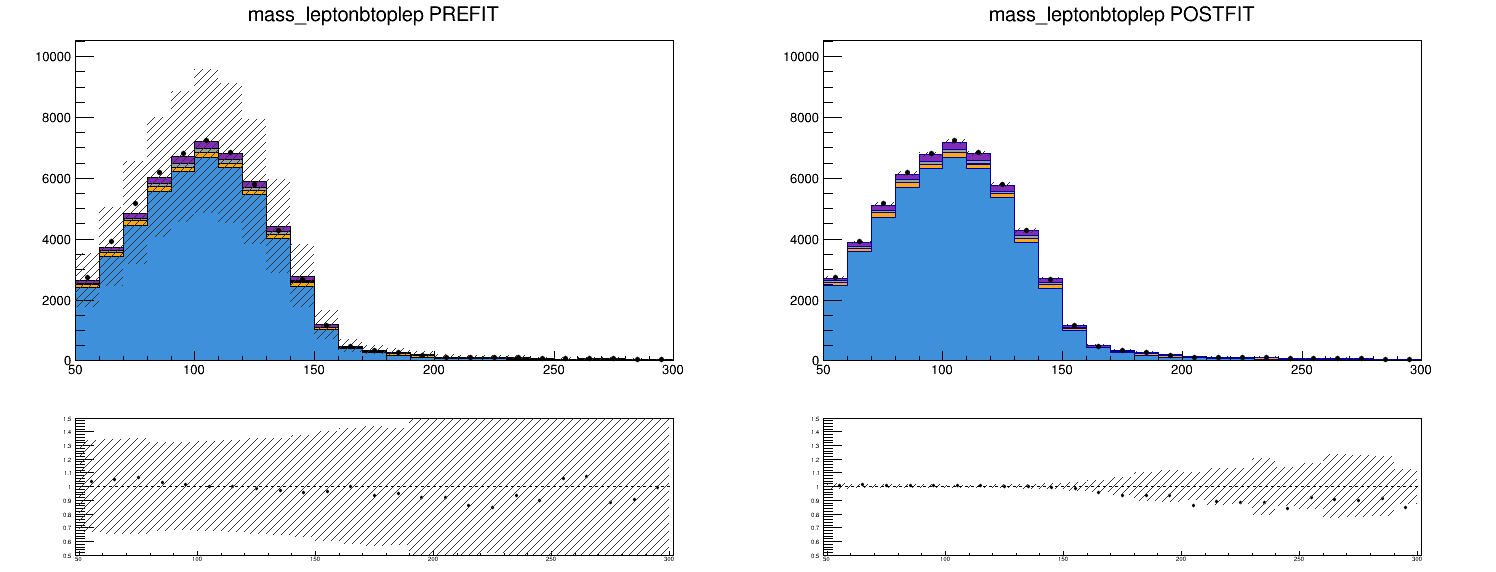

In [5]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_mass_leptonbtoplep")
channel.SetData("mass_leptonbtoplep_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "mass_leptonbtoplep_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "mass_leptonbtoplep_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "mass_leptonbtoplep_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "mass_leptonbtoplep_ttbar_scaleup",        histoname_down = "mass_leptonbtoplep_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_leptonbtoplep_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "mass_leptonbtoplep_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_leptonbtoplep_ttbar_btag_var_0_up",  histoname_down = "mass_leptonbtoplep_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_leptonbtoplep_ttbar_btag_var_1_up",  histoname_down = "mass_leptonbtoplep_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_leptonbtoplep_ttbar_btag_var_2_up",  histoname_down = "mass_leptonbtoplep_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_leptonbtoplep_ttbar_btag_var_3_up",  histoname_down = "mass_leptonbtoplep_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "mass_leptonbtoplep_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "mass_leptonbtoplep_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "mass_leptonbtoplep_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "mass_leptonbtoplep_wjets_btag_var_0_up",  histoname_down = "mass_leptonbtoplep_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "mass_leptonbtoplep_wjets_btag_var_1_up",  histoname_down = "mass_leptonbtoplep_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "mass_leptonbtoplep_wjets_btag_var_2_up",  histoname_down = "mass_leptonbtoplep_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "mass_leptonbtoplep_wjets_btag_var_3_up",  histoname_down = "mass_leptonbtoplep_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "mass_leptonbtoplep_wjets_scale_var_up",   histoname_down = "mass_leptonbtoplep_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "mass_leptonbtoplep_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_leptonbtoplep_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "mass_leptonbtoplep_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_leptonbtoplep_single_top_s_chan_btag_var_0_up",  histoname_down = "mass_leptonbtoplep_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_leptonbtoplep_single_top_s_chan_btag_var_1_up",  histoname_down = "mass_leptonbtoplep_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_leptonbtoplep_single_top_s_chan_btag_var_2_up",  histoname_down = "mass_leptonbtoplep_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_leptonbtoplep_single_top_s_chan_btag_var_3_up",  histoname_down = "mass_leptonbtoplep_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "mass_leptonbtoplep_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_leptonbtoplep_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "mass_leptonbtoplep_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_leptonbtoplep_single_top_t_chan_btag_var_0_up",  histoname_down = "mass_leptonbtoplep_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_leptonbtoplep_single_top_t_chan_btag_var_1_up",  histoname_down = "mass_leptonbtoplep_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_leptonbtoplep_single_top_t_chan_btag_var_2_up",  histoname_down = "mass_leptonbtoplep_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_leptonbtoplep_single_top_t_chan_btag_var_3_up",  histoname_down = "mass_leptonbtoplep_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "mass_leptonbtoplep_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_leptonbtoplep_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "mass_leptonbtoplep_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_leptonbtoplep_single_top_tW_btag_var_0_up",      histoname_down = "mass_leptonbtoplep_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_leptonbtoplep_single_top_tW_btag_var_1_up",      histoname_down = "mass_leptonbtoplep_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_leptonbtoplep_single_top_tW_btag_var_2_up",      histoname_down = "mass_leptonbtoplep_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_leptonbtoplep_single_top_tW_btag_var_3_up",      histoname_down = "mass_leptonbtoplep_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)


In [7]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_mass_w1w2")
channel.SetData("mass_w1w2_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "mass_w1w2_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "mass_w1w2_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "mass_w1w2_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "mass_w1w2_ttbar_scaleup",        histoname_down = "mass_w1w2_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_w1w2_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "mass_w1w2_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_w1w2_ttbar_btag_var_0_up",  histoname_down = "mass_w1w2_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_w1w2_ttbar_btag_var_1_up",  histoname_down = "mass_w1w2_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_w1w2_ttbar_btag_var_2_up",  histoname_down = "mass_w1w2_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_w1w2_ttbar_btag_var_3_up",  histoname_down = "mass_w1w2_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "mass_w1w2_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "mass_w1w2_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "mass_w1w2_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "mass_w1w2_wjets_btag_var_0_up",  histoname_down = "mass_w1w2_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "mass_w1w2_wjets_btag_var_1_up",  histoname_down = "mass_w1w2_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "mass_w1w2_wjets_btag_var_2_up",  histoname_down = "mass_w1w2_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "mass_w1w2_wjets_btag_var_3_up",  histoname_down = "mass_w1w2_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "mass_w1w2_wjets_scale_var_up",   histoname_down = "mass_w1w2_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "mass_w1w2_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_w1w2_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "mass_w1w2_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_w1w2_single_top_s_chan_btag_var_0_up",  histoname_down = "mass_w1w2_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_w1w2_single_top_s_chan_btag_var_1_up",  histoname_down = "mass_w1w2_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_w1w2_single_top_s_chan_btag_var_2_up",  histoname_down = "mass_w1w2_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_w1w2_single_top_s_chan_btag_var_3_up",  histoname_down = "mass_w1w2_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "mass_w1w2_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_w1w2_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "mass_w1w2_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_w1w2_single_top_t_chan_btag_var_0_up",  histoname_down = "mass_w1w2_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_w1w2_single_top_t_chan_btag_var_1_up",  histoname_down = "mass_w1w2_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_w1w2_single_top_t_chan_btag_var_2_up",  histoname_down = "mass_w1w2_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_w1w2_single_top_t_chan_btag_var_3_up",  histoname_down = "mass_w1w2_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "mass_w1w2_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_w1w2_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "mass_w1w2_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_w1w2_single_top_tW_btag_var_0_up",      histoname_down = "mass_w1w2_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_w1w2_single_top_tW_btag_var_1_up",      histoname_down = "mass_w1w2_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_w1w2_single_top_tW_btag_var_2_up",      histoname_down = "mass_w1w2_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_w1w2_single_top_tW_btag_var_3_up",      histoname_down = "mass_w1w2_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [8]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_mass_w1w2btophad")
channel.SetData("mass_w1w2btophad_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "mass_w1w2btophad_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "mass_w1w2btophad_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "mass_w1w2btophad_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "mass_w1w2btophad_ttbar_scaleup",        histoname_down = "mass_w1w2btophad_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_w1w2btophad_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "mass_w1w2btophad_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_w1w2btophad_ttbar_btag_var_0_up",  histoname_down = "mass_w1w2btophad_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_w1w2btophad_ttbar_btag_var_1_up",  histoname_down = "mass_w1w2btophad_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_w1w2btophad_ttbar_btag_var_2_up",  histoname_down = "mass_w1w2btophad_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_w1w2btophad_ttbar_btag_var_3_up",  histoname_down = "mass_w1w2btophad_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "mass_w1w2btophad_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "mass_w1w2btophad_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "mass_w1w2btophad_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "mass_w1w2btophad_wjets_btag_var_0_up",  histoname_down = "mass_w1w2btophad_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "mass_w1w2btophad_wjets_btag_var_1_up",  histoname_down = "mass_w1w2btophad_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "mass_w1w2btophad_wjets_btag_var_2_up",  histoname_down = "mass_w1w2btophad_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "mass_w1w2btophad_wjets_btag_var_3_up",  histoname_down = "mass_w1w2btophad_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "mass_w1w2btophad_wjets_scale_var_up",   histoname_down = "mass_w1w2btophad_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "mass_w1w2btophad_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_w1w2btophad_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "mass_w1w2btophad_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_w1w2btophad_single_top_s_chan_btag_var_0_up",  histoname_down = "mass_w1w2btophad_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_w1w2btophad_single_top_s_chan_btag_var_1_up",  histoname_down = "mass_w1w2btophad_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_w1w2btophad_single_top_s_chan_btag_var_2_up",  histoname_down = "mass_w1w2btophad_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_w1w2btophad_single_top_s_chan_btag_var_3_up",  histoname_down = "mass_w1w2btophad_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "mass_w1w2btophad_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_w1w2btophad_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "mass_w1w2btophad_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_w1w2btophad_single_top_t_chan_btag_var_0_up",  histoname_down = "mass_w1w2btophad_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_w1w2btophad_single_top_t_chan_btag_var_1_up",  histoname_down = "mass_w1w2btophad_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_w1w2btophad_single_top_t_chan_btag_var_2_up",  histoname_down = "mass_w1w2btophad_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_w1w2btophad_single_top_t_chan_btag_var_3_up",  histoname_down = "mass_w1w2btophad_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "mass_w1w2btophad_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "mass_w1w2btophad_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "mass_w1w2btophad_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "mass_w1w2btophad_single_top_tW_btag_var_0_up",      histoname_down = "mass_w1w2btophad_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "mass_w1w2btophad_single_top_tW_btag_var_1_up",      histoname_down = "mass_w1w2btophad_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "mass_w1w2btophad_single_top_tW_btag_var_2_up",      histoname_down = "mass_w1w2btophad_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "mass_w1w2btophad_single_top_tW_btag_var_3_up",      histoname_down = "mass_w1w2btophad_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [9]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_pt_w1")
channel.SetData("pt_w1_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "pt_w1_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "pt_w1_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "pt_w1_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "pt_w1_ttbar_scaleup",        histoname_down = "pt_w1_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_w1_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_w1_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_w1_ttbar_btag_var_0_up",  histoname_down = "pt_w1_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_w1_ttbar_btag_var_1_up",  histoname_down = "pt_w1_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_w1_ttbar_btag_var_2_up",  histoname_down = "pt_w1_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_w1_ttbar_btag_var_3_up",  histoname_down = "pt_w1_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "pt_w1_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "pt_w1_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "pt_w1_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "pt_w1_wjets_btag_var_0_up",  histoname_down = "pt_w1_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "pt_w1_wjets_btag_var_1_up",  histoname_down = "pt_w1_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "pt_w1_wjets_btag_var_2_up",  histoname_down = "pt_w1_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "pt_w1_wjets_btag_var_3_up",  histoname_down = "pt_w1_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "pt_w1_wjets_scale_var_up",   histoname_down = "pt_w1_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "pt_w1_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_w1_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_w1_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_w1_single_top_s_chan_btag_var_0_up",  histoname_down = "pt_w1_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_w1_single_top_s_chan_btag_var_1_up",  histoname_down = "pt_w1_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_w1_single_top_s_chan_btag_var_2_up",  histoname_down = "pt_w1_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_w1_single_top_s_chan_btag_var_3_up",  histoname_down = "pt_w1_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "pt_w1_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_w1_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_w1_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_w1_single_top_t_chan_btag_var_0_up",  histoname_down = "pt_w1_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_w1_single_top_t_chan_btag_var_1_up",  histoname_down = "pt_w1_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_w1_single_top_t_chan_btag_var_2_up",  histoname_down = "pt_w1_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_w1_single_top_t_chan_btag_var_3_up",  histoname_down = "pt_w1_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "pt_w1_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_w1_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "pt_w1_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_w1_single_top_tW_btag_var_0_up",      histoname_down = "pt_w1_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_w1_single_top_tW_btag_var_1_up",      histoname_down = "pt_w1_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_w1_single_top_tW_btag_var_2_up",      histoname_down = "pt_w1_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_w1_single_top_tW_btag_var_3_up",      histoname_down = "pt_w1_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [10]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_pt_w2")
channel.SetData("pt_w2_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "pt_w2_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "pt_w2_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "pt_w2_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "pt_w2_ttbar_scaleup",        histoname_down = "pt_w2_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_w2_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_w2_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_w2_ttbar_btag_var_0_up",  histoname_down = "pt_w2_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_w2_ttbar_btag_var_1_up",  histoname_down = "pt_w2_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_w2_ttbar_btag_var_2_up",  histoname_down = "pt_w2_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_w2_ttbar_btag_var_3_up",  histoname_down = "pt_w2_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "pt_w2_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "pt_w2_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "pt_w2_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "pt_w2_wjets_btag_var_0_up",  histoname_down = "pt_w2_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "pt_w2_wjets_btag_var_1_up",  histoname_down = "pt_w2_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "pt_w2_wjets_btag_var_2_up",  histoname_down = "pt_w2_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "pt_w2_wjets_btag_var_3_up",  histoname_down = "pt_w2_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "pt_w2_wjets_scale_var_up",   histoname_down = "pt_w2_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "pt_w2_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_w2_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_w2_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_w2_single_top_s_chan_btag_var_0_up",  histoname_down = "pt_w2_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_w2_single_top_s_chan_btag_var_1_up",  histoname_down = "pt_w2_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_w2_single_top_s_chan_btag_var_2_up",  histoname_down = "pt_w2_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_w2_single_top_s_chan_btag_var_3_up",  histoname_down = "pt_w2_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "pt_w2_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_w2_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_w2_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_w2_single_top_t_chan_btag_var_0_up",  histoname_down = "pt_w2_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_w2_single_top_t_chan_btag_var_1_up",  histoname_down = "pt_w2_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_w2_single_top_t_chan_btag_var_2_up",  histoname_down = "pt_w2_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_w2_single_top_t_chan_btag_var_3_up",  histoname_down = "pt_w2_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "pt_w2_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_w2_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "pt_w2_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_w2_single_top_tW_btag_var_0_up",      histoname_down = "pt_w2_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_w2_single_top_tW_btag_var_1_up",      histoname_down = "pt_w2_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_w2_single_top_tW_btag_var_2_up",      histoname_down = "pt_w2_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_w2_single_top_tW_btag_var_3_up",      histoname_down = "pt_w2_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [11]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_pt_btophad")
channel.SetData("pt_btophad_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "pt_btophad_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "pt_btophad_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "pt_btophad_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "pt_btophad_ttbar_scaleup",        histoname_down = "pt_btophad_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_btophad_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_btophad_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_btophad_ttbar_btag_var_0_up",  histoname_down = "pt_btophad_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_btophad_ttbar_btag_var_1_up",  histoname_down = "pt_btophad_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_btophad_ttbar_btag_var_2_up",  histoname_down = "pt_btophad_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_btophad_ttbar_btag_var_3_up",  histoname_down = "pt_btophad_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "pt_btophad_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "pt_btophad_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "pt_btophad_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "pt_btophad_wjets_btag_var_0_up",  histoname_down = "pt_btophad_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "pt_btophad_wjets_btag_var_1_up",  histoname_down = "pt_btophad_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "pt_btophad_wjets_btag_var_2_up",  histoname_down = "pt_btophad_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "pt_btophad_wjets_btag_var_3_up",  histoname_down = "pt_btophad_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "pt_btophad_wjets_scale_var_up",   histoname_down = "pt_btophad_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "pt_btophad_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_btophad_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_btophad_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_btophad_single_top_s_chan_btag_var_0_up",  histoname_down = "pt_btophad_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_btophad_single_top_s_chan_btag_var_1_up",  histoname_down = "pt_btophad_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_btophad_single_top_s_chan_btag_var_2_up",  histoname_down = "pt_btophad_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_btophad_single_top_s_chan_btag_var_3_up",  histoname_down = "pt_btophad_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "pt_btophad_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_btophad_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_btophad_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_btophad_single_top_t_chan_btag_var_0_up",  histoname_down = "pt_btophad_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_btophad_single_top_t_chan_btag_var_1_up",  histoname_down = "pt_btophad_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_btophad_single_top_t_chan_btag_var_2_up",  histoname_down = "pt_btophad_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_btophad_single_top_t_chan_btag_var_3_up",  histoname_down = "pt_btophad_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "pt_btophad_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_btophad_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "pt_btophad_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_btophad_single_top_tW_btag_var_0_up",      histoname_down = "pt_btophad_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_btophad_single_top_tW_btag_var_1_up",      histoname_down = "pt_btophad_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_btophad_single_top_tW_btag_var_2_up",      histoname_down = "pt_btophad_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_btophad_single_top_tW_btag_var_3_up",      histoname_down = "pt_btophad_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [12]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_pt_btoplep")
channel.SetData("pt_btoplep_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "pt_btoplep_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "pt_btoplep_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "pt_btoplep_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "pt_btoplep_ttbar_scaleup",        histoname_down = "pt_btoplep_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_btoplep_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_btoplep_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_btoplep_ttbar_btag_var_0_up",  histoname_down = "pt_btoplep_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_btoplep_ttbar_btag_var_1_up",  histoname_down = "pt_btoplep_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_btoplep_ttbar_btag_var_2_up",  histoname_down = "pt_btoplep_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_btoplep_ttbar_btag_var_3_up",  histoname_down = "pt_btoplep_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "pt_btoplep_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "pt_btoplep_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "pt_btoplep_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "pt_btoplep_wjets_btag_var_0_up",  histoname_down = "pt_btoplep_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "pt_btoplep_wjets_btag_var_1_up",  histoname_down = "pt_btoplep_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "pt_btoplep_wjets_btag_var_2_up",  histoname_down = "pt_btoplep_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "pt_btoplep_wjets_btag_var_3_up",  histoname_down = "pt_btoplep_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "pt_btoplep_wjets_scale_var_up",   histoname_down = "pt_btoplep_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "pt_btoplep_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_btoplep_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_btoplep_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_btoplep_single_top_s_chan_btag_var_0_up",  histoname_down = "pt_btoplep_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_btoplep_single_top_s_chan_btag_var_1_up",  histoname_down = "pt_btoplep_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_btoplep_single_top_s_chan_btag_var_2_up",  histoname_down = "pt_btoplep_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_btoplep_single_top_s_chan_btag_var_3_up",  histoname_down = "pt_btoplep_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "pt_btoplep_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_btoplep_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "pt_btoplep_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_btoplep_single_top_t_chan_btag_var_0_up",  histoname_down = "pt_btoplep_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_btoplep_single_top_t_chan_btag_var_1_up",  histoname_down = "pt_btoplep_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_btoplep_single_top_t_chan_btag_var_2_up",  histoname_down = "pt_btoplep_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_btoplep_single_top_t_chan_btag_var_3_up",  histoname_down = "pt_btoplep_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "pt_btoplep_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "pt_btoplep_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "pt_btoplep_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "pt_btoplep_single_top_tW_btag_var_0_up",      histoname_down = "pt_btoplep_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "pt_btoplep_single_top_tW_btag_var_1_up",      histoname_down = "pt_btoplep_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "pt_btoplep_single_top_tW_btag_var_2_up",      histoname_down = "pt_btoplep_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "pt_btoplep_single_top_tW_btag_var_3_up",      histoname_down = "pt_btoplep_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [13]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_btag_w1")
channel.SetData("btag_w1_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "btag_w1_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "btag_w1_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "btag_w1_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "btag_w1_ttbar_scaleup",        histoname_down = "btag_w1_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_w1_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_w1_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_w1_ttbar_btag_var_0_up",  histoname_down = "btag_w1_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_w1_ttbar_btag_var_1_up",  histoname_down = "btag_w1_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_w1_ttbar_btag_var_2_up",  histoname_down = "btag_w1_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_w1_ttbar_btag_var_3_up",  histoname_down = "btag_w1_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "btag_w1_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "btag_w1_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "btag_w1_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "btag_w1_wjets_btag_var_0_up",  histoname_down = "btag_w1_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "btag_w1_wjets_btag_var_1_up",  histoname_down = "btag_w1_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "btag_w1_wjets_btag_var_2_up",  histoname_down = "btag_w1_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "btag_w1_wjets_btag_var_3_up",  histoname_down = "btag_w1_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "btag_w1_wjets_scale_var_up",   histoname_down = "btag_w1_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "btag_w1_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_w1_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_w1_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_w1_single_top_s_chan_btag_var_0_up",  histoname_down = "btag_w1_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_w1_single_top_s_chan_btag_var_1_up",  histoname_down = "btag_w1_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_w1_single_top_s_chan_btag_var_2_up",  histoname_down = "btag_w1_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_w1_single_top_s_chan_btag_var_3_up",  histoname_down = "btag_w1_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "btag_w1_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_w1_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_w1_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_w1_single_top_t_chan_btag_var_0_up",  histoname_down = "btag_w1_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_w1_single_top_t_chan_btag_var_1_up",  histoname_down = "btag_w1_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_w1_single_top_t_chan_btag_var_2_up",  histoname_down = "btag_w1_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_w1_single_top_t_chan_btag_var_3_up",  histoname_down = "btag_w1_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "btag_w1_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_w1_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "btag_w1_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_w1_single_top_tW_btag_var_0_up",      histoname_down = "btag_w1_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_w1_single_top_tW_btag_var_1_up",      histoname_down = "btag_w1_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_w1_single_top_tW_btag_var_2_up",      histoname_down = "btag_w1_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_w1_single_top_tW_btag_var_3_up",      histoname_down = "btag_w1_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [14]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_btag_w2")
channel.SetData("btag_w2_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "btag_w2_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "btag_w2_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "btag_w2_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "btag_w2_ttbar_scaleup",        histoname_down = "btag_w2_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_w2_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_w2_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_w2_ttbar_btag_var_0_up",  histoname_down = "btag_w2_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_w2_ttbar_btag_var_1_up",  histoname_down = "btag_w2_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_w2_ttbar_btag_var_2_up",  histoname_down = "btag_w2_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_w2_ttbar_btag_var_3_up",  histoname_down = "btag_w2_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "btag_w2_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "btag_w2_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "btag_w2_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "btag_w2_wjets_btag_var_0_up",  histoname_down = "btag_w2_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "btag_w2_wjets_btag_var_1_up",  histoname_down = "btag_w2_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "btag_w2_wjets_btag_var_2_up",  histoname_down = "btag_w2_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "btag_w2_wjets_btag_var_3_up",  histoname_down = "btag_w2_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "btag_w2_wjets_scale_var_up",   histoname_down = "btag_w2_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "btag_w2_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_w2_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_w2_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_w2_single_top_s_chan_btag_var_0_up",  histoname_down = "btag_w2_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_w2_single_top_s_chan_btag_var_1_up",  histoname_down = "btag_w2_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_w2_single_top_s_chan_btag_var_2_up",  histoname_down = "btag_w2_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_w2_single_top_s_chan_btag_var_3_up",  histoname_down = "btag_w2_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "btag_w2_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_w2_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_w2_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_w2_single_top_t_chan_btag_var_0_up",  histoname_down = "btag_w2_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_w2_single_top_t_chan_btag_var_1_up",  histoname_down = "btag_w2_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_w2_single_top_t_chan_btag_var_2_up",  histoname_down = "btag_w2_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_w2_single_top_t_chan_btag_var_3_up",  histoname_down = "btag_w2_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "btag_w2_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_w2_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "btag_w2_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_w2_single_top_tW_btag_var_0_up",      histoname_down = "btag_w2_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_w2_single_top_tW_btag_var_1_up",      histoname_down = "btag_w2_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_w2_single_top_tW_btag_var_2_up",      histoname_down = "btag_w2_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_w2_single_top_tW_btag_var_3_up",      histoname_down = "btag_w2_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [15]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_btag_btophad")
channel.SetData("btag_btophad_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "btag_btophad_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "btag_btophad_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "btag_btophad_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "btag_btophad_ttbar_scaleup",        histoname_down = "btag_btophad_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_btophad_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_btophad_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_btophad_ttbar_btag_var_0_up",  histoname_down = "btag_btophad_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_btophad_ttbar_btag_var_1_up",  histoname_down = "btag_btophad_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_btophad_ttbar_btag_var_2_up",  histoname_down = "btag_btophad_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_btophad_ttbar_btag_var_3_up",  histoname_down = "btag_btophad_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "btag_btophad_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "btag_btophad_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "btag_btophad_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "btag_btophad_wjets_btag_var_0_up",  histoname_down = "btag_btophad_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "btag_btophad_wjets_btag_var_1_up",  histoname_down = "btag_btophad_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "btag_btophad_wjets_btag_var_2_up",  histoname_down = "btag_btophad_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "btag_btophad_wjets_btag_var_3_up",  histoname_down = "btag_btophad_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "btag_btophad_wjets_scale_var_up",   histoname_down = "btag_btophad_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "btag_btophad_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_btophad_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_btophad_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_btophad_single_top_s_chan_btag_var_0_up",  histoname_down = "btag_btophad_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_btophad_single_top_s_chan_btag_var_1_up",  histoname_down = "btag_btophad_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_btophad_single_top_s_chan_btag_var_2_up",  histoname_down = "btag_btophad_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_btophad_single_top_s_chan_btag_var_3_up",  histoname_down = "btag_btophad_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "btag_btophad_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_btophad_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_btophad_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_btophad_single_top_t_chan_btag_var_0_up",  histoname_down = "btag_btophad_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_btophad_single_top_t_chan_btag_var_1_up",  histoname_down = "btag_btophad_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_btophad_single_top_t_chan_btag_var_2_up",  histoname_down = "btag_btophad_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_btophad_single_top_t_chan_btag_var_3_up",  histoname_down = "btag_btophad_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "btag_btophad_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_btophad_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "btag_btophad_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_btophad_single_top_tW_btag_var_0_up",      histoname_down = "btag_btophad_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_btophad_single_top_tW_btag_var_1_up",      histoname_down = "btag_btophad_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_btophad_single_top_tW_btag_var_2_up",      histoname_down = "btag_btophad_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_btophad_single_top_tW_btag_var_3_up",      histoname_down = "btag_btophad_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [16]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_btag_btoplep")
channel.SetData("btag_btoplep_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "btag_btoplep_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "btag_btoplep_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "btag_btoplep_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "btag_btoplep_ttbar_scaleup",        histoname_down = "btag_btoplep_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_btoplep_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_btoplep_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_btoplep_ttbar_btag_var_0_up",  histoname_down = "btag_btoplep_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_btoplep_ttbar_btag_var_1_up",  histoname_down = "btag_btoplep_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_btoplep_ttbar_btag_var_2_up",  histoname_down = "btag_btoplep_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_btoplep_ttbar_btag_var_3_up",  histoname_down = "btag_btoplep_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "btag_btoplep_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "btag_btoplep_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "btag_btoplep_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "btag_btoplep_wjets_btag_var_0_up",  histoname_down = "btag_btoplep_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "btag_btoplep_wjets_btag_var_1_up",  histoname_down = "btag_btoplep_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "btag_btoplep_wjets_btag_var_2_up",  histoname_down = "btag_btoplep_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "btag_btoplep_wjets_btag_var_3_up",  histoname_down = "btag_btoplep_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "btag_btoplep_wjets_scale_var_up",   histoname_down = "btag_btoplep_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "btag_btoplep_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_btoplep_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_btoplep_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_btoplep_single_top_s_chan_btag_var_0_up",  histoname_down = "btag_btoplep_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_btoplep_single_top_s_chan_btag_var_1_up",  histoname_down = "btag_btoplep_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_btoplep_single_top_s_chan_btag_var_2_up",  histoname_down = "btag_btoplep_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_btoplep_single_top_s_chan_btag_var_3_up",  histoname_down = "btag_btoplep_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "btag_btoplep_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_btoplep_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "btag_btoplep_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_btoplep_single_top_t_chan_btag_var_0_up",  histoname_down = "btag_btoplep_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_btoplep_single_top_t_chan_btag_var_1_up",  histoname_down = "btag_btoplep_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_btoplep_single_top_t_chan_btag_var_2_up",  histoname_down = "btag_btoplep_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_btoplep_single_top_t_chan_btag_var_3_up",  histoname_down = "btag_btoplep_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "btag_btoplep_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "btag_btoplep_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "btag_btoplep_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "btag_btoplep_single_top_tW_btag_var_0_up",      histoname_down = "btag_btoplep_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "btag_btoplep_single_top_tW_btag_var_1_up",      histoname_down = "btag_btoplep_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "btag_btoplep_single_top_tW_btag_var_2_up",      histoname_down = "btag_btoplep_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "btag_btoplep_single_top_tW_btag_var_3_up",      histoname_down = "btag_btoplep_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [17]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_qgl_w1")
channel.SetData("qgl_w1_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "qgl_w1_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "qgl_w1_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "qgl_w1_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "qgl_w1_ttbar_scaleup",        histoname_down = "qgl_w1_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_w1_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_w1_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_w1_ttbar_btag_var_0_up",  histoname_down = "qgl_w1_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_w1_ttbar_btag_var_1_up",  histoname_down = "qgl_w1_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_w1_ttbar_btag_var_2_up",  histoname_down = "qgl_w1_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_w1_ttbar_btag_var_3_up",  histoname_down = "qgl_w1_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "qgl_w1_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "qgl_w1_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "qgl_w1_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "qgl_w1_wjets_btag_var_0_up",  histoname_down = "qgl_w1_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "qgl_w1_wjets_btag_var_1_up",  histoname_down = "qgl_w1_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "qgl_w1_wjets_btag_var_2_up",  histoname_down = "qgl_w1_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "qgl_w1_wjets_btag_var_3_up",  histoname_down = "qgl_w1_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "qgl_w1_wjets_scale_var_up",   histoname_down = "qgl_w1_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "qgl_w1_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_w1_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_w1_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_w1_single_top_s_chan_btag_var_0_up",  histoname_down = "qgl_w1_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_w1_single_top_s_chan_btag_var_1_up",  histoname_down = "qgl_w1_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_w1_single_top_s_chan_btag_var_2_up",  histoname_down = "qgl_w1_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_w1_single_top_s_chan_btag_var_3_up",  histoname_down = "qgl_w1_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "qgl_w1_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_w1_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_w1_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_w1_single_top_t_chan_btag_var_0_up",  histoname_down = "qgl_w1_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_w1_single_top_t_chan_btag_var_1_up",  histoname_down = "qgl_w1_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_w1_single_top_t_chan_btag_var_2_up",  histoname_down = "qgl_w1_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_w1_single_top_t_chan_btag_var_3_up",  histoname_down = "qgl_w1_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "qgl_w1_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_w1_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "qgl_w1_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_w1_single_top_tW_btag_var_0_up",      histoname_down = "qgl_w1_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_w1_single_top_tW_btag_var_1_up",      histoname_down = "qgl_w1_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_w1_single_top_tW_btag_var_2_up",      histoname_down = "qgl_w1_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_w1_single_top_tW_btag_var_3_up",      histoname_down = "qgl_w1_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [18]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_qgl_w2")
channel.SetData("qgl_w2_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "qgl_w2_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "qgl_w2_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "qgl_w2_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "qgl_w2_ttbar_scaleup",        histoname_down = "qgl_w2_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_w2_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_w2_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_w2_ttbar_btag_var_0_up",  histoname_down = "qgl_w2_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_w2_ttbar_btag_var_1_up",  histoname_down = "qgl_w2_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_w2_ttbar_btag_var_2_up",  histoname_down = "qgl_w2_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_w2_ttbar_btag_var_3_up",  histoname_down = "qgl_w2_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "qgl_w2_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "qgl_w2_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "qgl_w2_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "qgl_w2_wjets_btag_var_0_up",  histoname_down = "qgl_w2_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "qgl_w2_wjets_btag_var_1_up",  histoname_down = "qgl_w2_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "qgl_w2_wjets_btag_var_2_up",  histoname_down = "qgl_w2_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "qgl_w2_wjets_btag_var_3_up",  histoname_down = "qgl_w2_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "qgl_w2_wjets_scale_var_up",   histoname_down = "qgl_w2_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "qgl_w2_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_w2_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_w2_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_w2_single_top_s_chan_btag_var_0_up",  histoname_down = "qgl_w2_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_w2_single_top_s_chan_btag_var_1_up",  histoname_down = "qgl_w2_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_w2_single_top_s_chan_btag_var_2_up",  histoname_down = "qgl_w2_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_w2_single_top_s_chan_btag_var_3_up",  histoname_down = "qgl_w2_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "qgl_w2_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_w2_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_w2_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_w2_single_top_t_chan_btag_var_0_up",  histoname_down = "qgl_w2_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_w2_single_top_t_chan_btag_var_1_up",  histoname_down = "qgl_w2_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_w2_single_top_t_chan_btag_var_2_up",  histoname_down = "qgl_w2_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_w2_single_top_t_chan_btag_var_3_up",  histoname_down = "qgl_w2_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "qgl_w2_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_w2_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "qgl_w2_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_w2_single_top_tW_btag_var_0_up",      histoname_down = "qgl_w2_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_w2_single_top_tW_btag_var_1_up",      histoname_down = "qgl_w2_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_w2_single_top_tW_btag_var_2_up",      histoname_down = "qgl_w2_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_w2_single_top_tW_btag_var_3_up",      histoname_down = "qgl_w2_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [19]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_qgl_btophad")
channel.SetData("qgl_btophad_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "qgl_btophad_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "qgl_btophad_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "qgl_btophad_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "qgl_btophad_ttbar_scaleup",        histoname_down = "qgl_btophad_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_btophad_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_btophad_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_btophad_ttbar_btag_var_0_up",  histoname_down = "qgl_btophad_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_btophad_ttbar_btag_var_1_up",  histoname_down = "qgl_btophad_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_btophad_ttbar_btag_var_2_up",  histoname_down = "qgl_btophad_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_btophad_ttbar_btag_var_3_up",  histoname_down = "qgl_btophad_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "qgl_btophad_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "qgl_btophad_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "qgl_btophad_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "qgl_btophad_wjets_btag_var_0_up",  histoname_down = "qgl_btophad_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "qgl_btophad_wjets_btag_var_1_up",  histoname_down = "qgl_btophad_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "qgl_btophad_wjets_btag_var_2_up",  histoname_down = "qgl_btophad_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "qgl_btophad_wjets_btag_var_3_up",  histoname_down = "qgl_btophad_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "qgl_btophad_wjets_scale_var_up",   histoname_down = "qgl_btophad_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "qgl_btophad_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_btophad_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_btophad_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_btophad_single_top_s_chan_btag_var_0_up",  histoname_down = "qgl_btophad_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_btophad_single_top_s_chan_btag_var_1_up",  histoname_down = "qgl_btophad_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_btophad_single_top_s_chan_btag_var_2_up",  histoname_down = "qgl_btophad_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_btophad_single_top_s_chan_btag_var_3_up",  histoname_down = "qgl_btophad_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "qgl_btophad_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_btophad_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_btophad_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_btophad_single_top_t_chan_btag_var_0_up",  histoname_down = "qgl_btophad_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_btophad_single_top_t_chan_btag_var_1_up",  histoname_down = "qgl_btophad_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_btophad_single_top_t_chan_btag_var_2_up",  histoname_down = "qgl_btophad_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_btophad_single_top_t_chan_btag_var_3_up",  histoname_down = "qgl_btophad_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "qgl_btophad_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_btophad_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "qgl_btophad_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_btophad_single_top_tW_btag_var_0_up",      histoname_down = "qgl_btophad_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_btophad_single_top_tW_btag_var_1_up",      histoname_down = "qgl_btophad_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_btophad_single_top_tW_btag_var_2_up",      histoname_down = "qgl_btophad_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_btophad_single_top_tW_btag_var_3_up",      histoname_down = "qgl_btophad_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)

NameError: name 'input_file' is not defined

In [ ]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_qgl_btoplep")
channel.SetData("qgl_btoplep_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "qgl_btoplep_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "qgl_btoplep_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "qgl_btoplep_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "qgl_btoplep_ttbar_scaleup",        histoname_down = "qgl_btoplep_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_btoplep_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_btoplep_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_btoplep_ttbar_btag_var_0_up",  histoname_down = "qgl_btoplep_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_btoplep_ttbar_btag_var_1_up",  histoname_down = "qgl_btoplep_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_btoplep_ttbar_btag_var_2_up",  histoname_down = "qgl_btoplep_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_btoplep_ttbar_btag_var_3_up",  histoname_down = "qgl_btoplep_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "qgl_btoplep_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "qgl_btoplep_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "qgl_btoplep_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "qgl_btoplep_wjets_btag_var_0_up",  histoname_down = "qgl_btoplep_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "qgl_btoplep_wjets_btag_var_1_up",  histoname_down = "qgl_btoplep_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "qgl_btoplep_wjets_btag_var_2_up",  histoname_down = "qgl_btoplep_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "qgl_btoplep_wjets_btag_var_3_up",  histoname_down = "qgl_btoplep_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "qgl_btoplep_wjets_scale_var_up",   histoname_down = "qgl_btoplep_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "qgl_btoplep_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_btoplep_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_btoplep_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_btoplep_single_top_s_chan_btag_var_0_up",  histoname_down = "qgl_btoplep_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_btoplep_single_top_s_chan_btag_var_1_up",  histoname_down = "qgl_btoplep_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_btoplep_single_top_s_chan_btag_var_2_up",  histoname_down = "qgl_btoplep_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_btoplep_single_top_s_chan_btag_var_3_up",  histoname_down = "qgl_btoplep_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "qgl_btoplep_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_btoplep_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "qgl_btoplep_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_btoplep_single_top_t_chan_btag_var_0_up",  histoname_down = "qgl_btoplep_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_btoplep_single_top_t_chan_btag_var_1_up",  histoname_down = "qgl_btoplep_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_btoplep_single_top_t_chan_btag_var_2_up",  histoname_down = "qgl_btoplep_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_btoplep_single_top_t_chan_btag_var_3_up",  histoname_down = "qgl_btoplep_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "qgl_btoplep_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "qgl_btoplep_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "qgl_btoplep_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "qgl_btoplep_single_top_tW_btag_var_0_up",      histoname_down = "qgl_btoplep_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "qgl_btoplep_single_top_tW_btag_var_1_up",      histoname_down = "qgl_btoplep_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "qgl_btoplep_single_top_tW_btag_var_2_up",      histoname_down = "qgl_btoplep_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "qgl_btoplep_single_top_tW_btag_var_3_up",      histoname_down = "qgl_btoplep_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(fit_result, no_fit = True)